# Logistic Regression  => classification 
=> probabilistic model

- used for the classification

In [37]:
from sklearn.linear_model import LogisticRegression
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns

In [9]:
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("diabetes.csv")

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.isnull().sum()    

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
x=df[['Age']]
y=df.Outcome

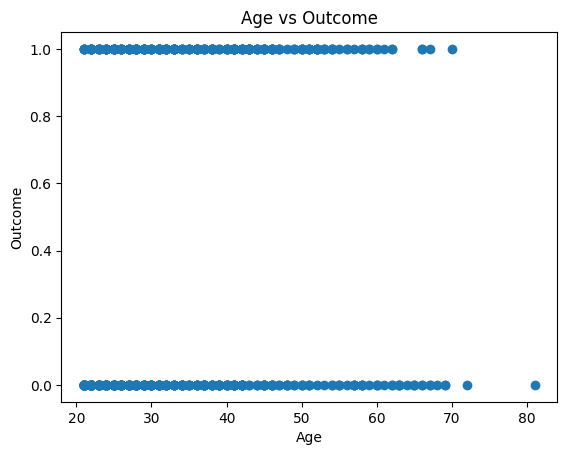

In [11]:
plt.scatter(df.Age,df.Outcome)  # y is the target variable 
plt.xlabel('Age')
plt.title('Age vs Outcome')
plt.ylabel('Outcome')
plt.show()

In [ ]:
 z=b0+b1x
y=sigmoid(z)

In [ ]:
# equation of the sigmoid
1/1+e^-z

In [13]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=25)

In [14]:
log_model=LogisticRegression()
log_model.fit(xtrain,ytrain)

LogisticRegression()

In [17]:
pred_new=pd.DataFrame({
    'Age':[50]
})

In [21]:
# predection 
# age=40
predicted_class =log_model.predict(pred_new)                                   # to know the predection  
print(predicted_class)                          # here the 0utput is 1 so the diabetes is positive if 0 then diabetes is negative 

[1]


In [23]:
predicted_probabilities = log_model.predict_proba(pred_new)           # this help in dispalying the prob of each class either 0 or 1 
print("Predicted Probabilities:", predicted_probabilities)  

Predicted Probabilities: [[0.49137472 0.50862528]]


In [ ]:
# here in the above cell output the prob of 0 class is 0.4913 and the prob of the class 1 is 0.50 so class 1 is predected

In [ ]:
(0,1)=>(0.49137472 0.50862528)                                        #higher prob higher class 

In [ ]:
# Evaluation kasari garne ta aaba 

In [ ]:
here the target variable is either 0  or 1 
=> if the actual row has 0 target  and the model also predict 0 this is correct
=> if the actual row has 0 target  and the model also predict 1 this is incorrect
=> if the actual row has 1 target  and the model also predict 1 this is correct
=> if the actual row has 1 target  and the model also predict 0 this is incorrect

In [24]:
xtest

,Age
459,81
39,56
344,57
84,37
700,26
...,...
410,28
114,39
246,41
506,35


In [25]:
ypredection=log_model.predict(xtest)

In [26]:
ytest

459    0
39     1
344    0
84     1
700    0
      ..
410    0
114    1
246    0
506    1
597    0
Name: Outcome, Length: 154, dtype: int64

In [27]:
ypredection

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
0 -0(correct)
1-1(correct)
0-1(incorrect)
1-0(incorrect)


In [ ]:
# confusion matrix 
jati ota classification garno parne xa teti ota row* column matrix banxa
hamro ma 2 ota xa (0,1) so 2*2 matrix banxa  
positive predection vayo tera False vayo actual vanda  =>False positve (first ma row herne then column)
Negative predection vayo tera False vayo actual vanda => False Negative 

In [ ]:
Accuracy=(TP+TN)/(TP+FP+FN+TN)

In [28]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [33]:
accuracy=accuracy_score(ytest,ypredection)
print(f'Accuracy:{accuracy*100}')

Accuracy:64.28571428571429


In [ ]:
# confusion matrix

In [34]:
cm=confusion_matrix(ytest,ypredection)

In [35]:
cm

array([[93, 10],
       [45,  6]])

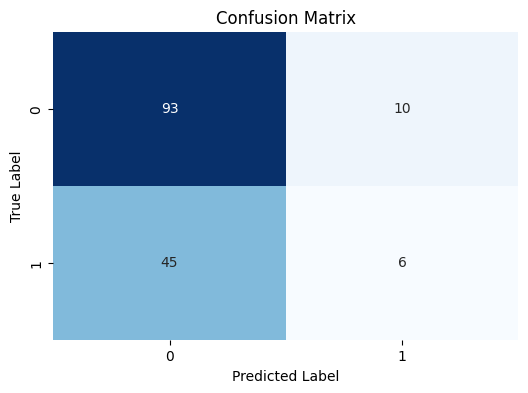

In [38]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
